In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import missingno as msno
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [184]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [186]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


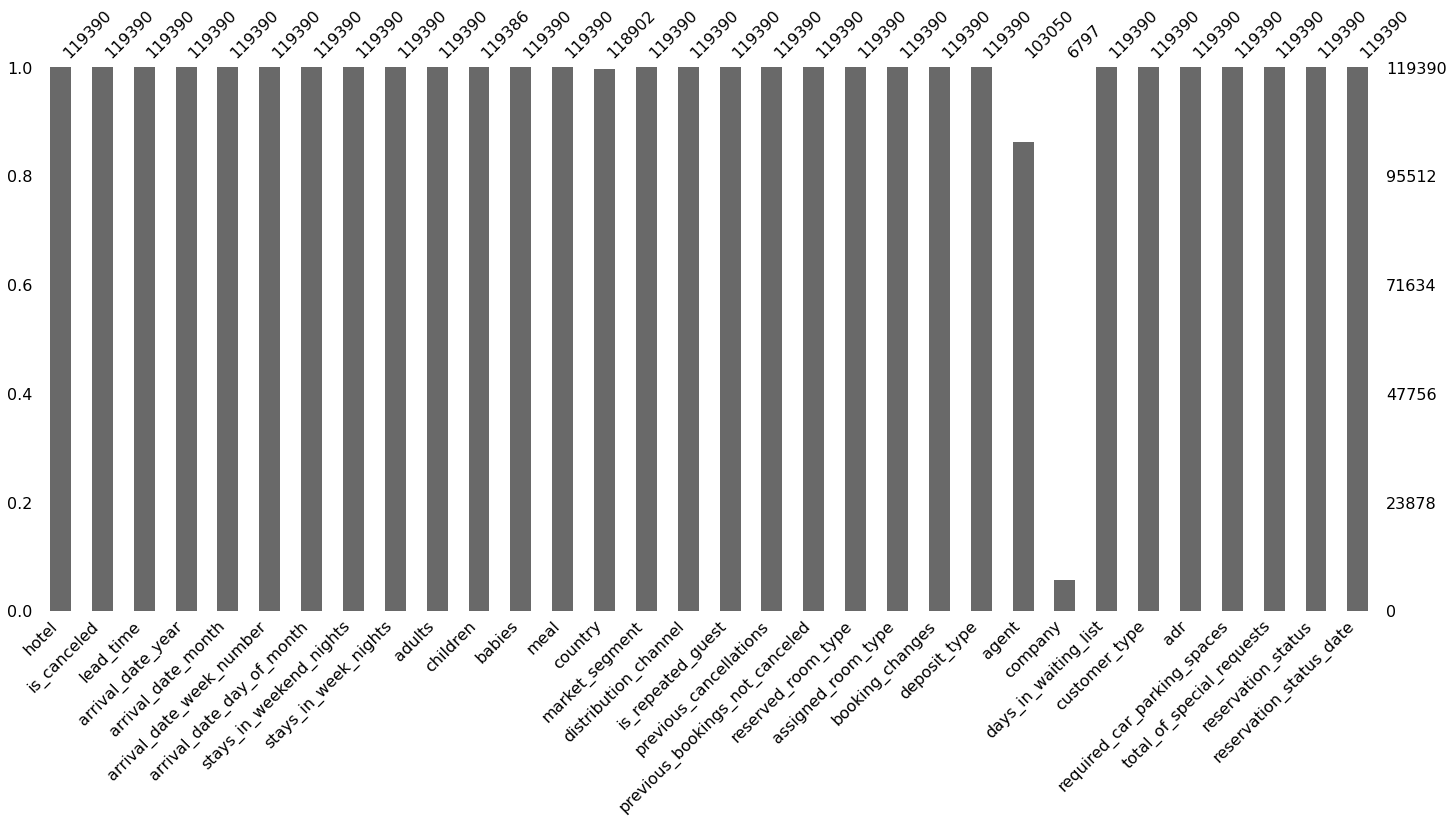

In [187]:
msno.bar(df)
plt.show()

In [188]:
df.fillna(0, inplace = True)

In [189]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.0
is_canceled,0,0.0
lead_time,0,0.0
arrival_date_year,0,0.0
arrival_date_month,0,0.0
arrival_date_week_number,0,0.0
arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,0,0.0
stays_in_week_nights,0,0.0
adults,0,0.0


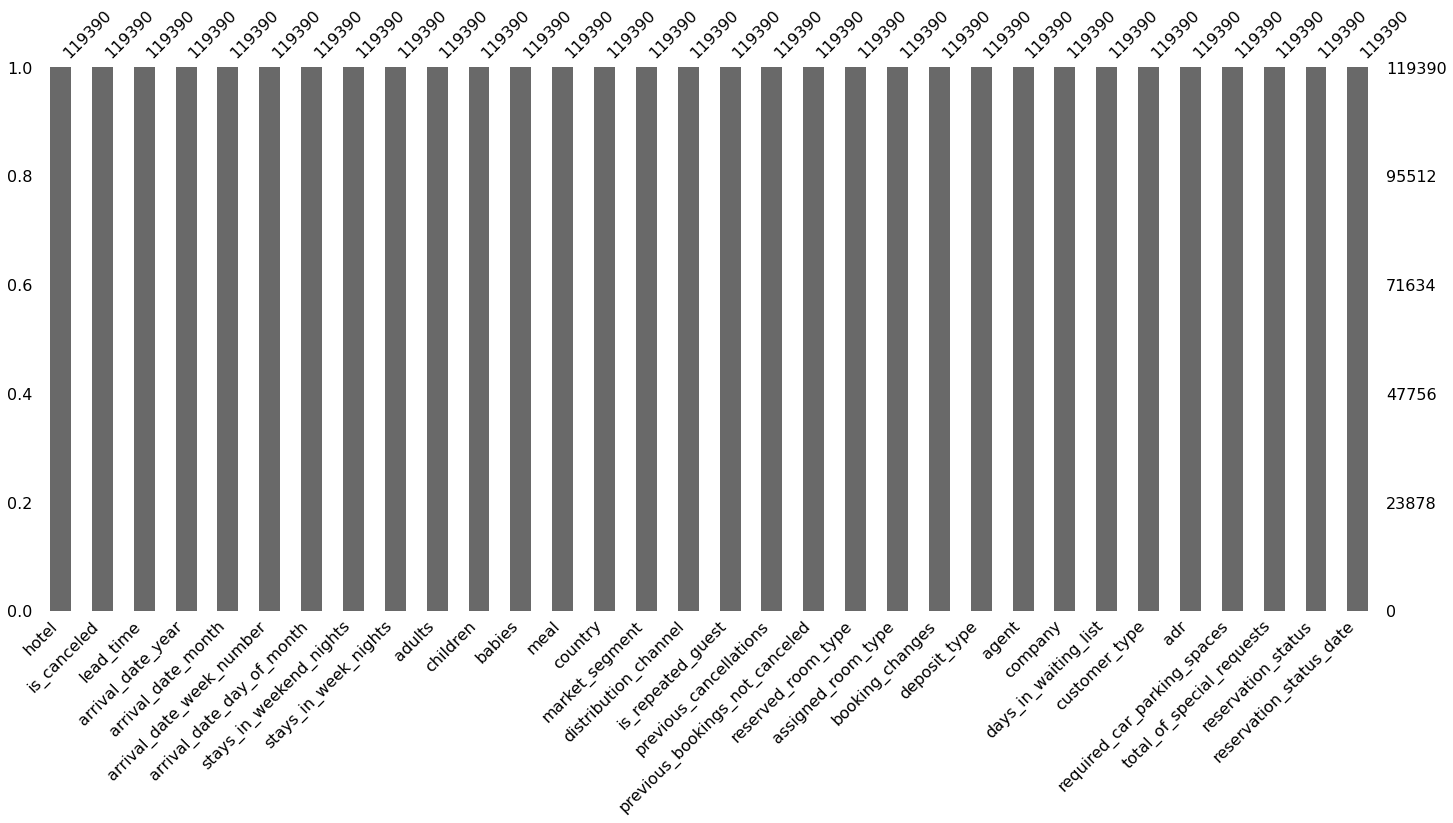

In [190]:
msno.bar(df)
plt.show()

In [191]:
#### REMOVE ROWS WITH 0 GUESTS
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [192]:
#### NUMERICAL FEATURES ####

In [193]:
correlation =  df.corr()['is_canceled']
correlation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [194]:
correlation = df.corr()['is_canceled'].sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
previous_cancellations            0.110139
adults                            0.058182
days_in_waiting_list              0.054301
adr                               0.046492
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
children                          0.004851
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
babies                           -0.032569
agent                            -0.046770
previous_bookings_not_canceled   -0.057365
company                          -0.083594
is_repeated_guest                -0.083745
booking_changes                  -0.144832
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

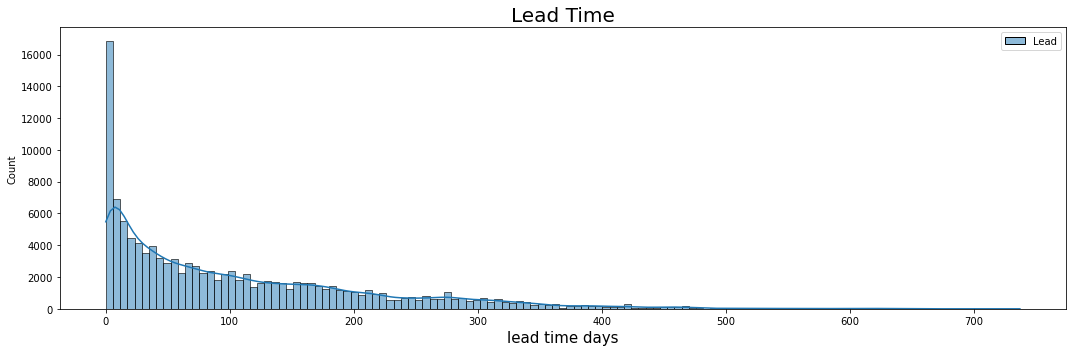

,0,1
0 up till 99 days,72.277131,27.722869
100 up till 364 days,50.106826,49.893174
365 up till inf. days,32.036115,67.963885


In [195]:
# Consider features above -/+0.1 correlation
# 1. Lead Time
### VISUALIZING LEAD TIME HISTOGRAM
plt.figure(figsize=(15,5))
lead_time = df['lead_time']
lead_time = pd.DataFrame(sorted(lead_time, reverse = True), columns = ['Lead'])
sns.histplot(lead_time, kde=True)
plt.title("Lead Time", size=20)
plt.xlabel("lead time days", size=15)
plt.tight_layout()
plt.show()


##### PERCENTAGE OF CANCELLATIONS AS LEAD TIME INCREASES
lead_time1 = df[df["lead_time"] < 100]
lead_time2= df[(df["lead_time"] >= 100) & (df["lead_time"] < 365)]
lead_time3 = df[df["lead_time"] >= 365]

lead_cancel1 = (lead_time1["is_canceled"].value_counts()/len(lead_time1.index))*100
lead_cancel2 = (lead_time2["is_canceled"].value_counts()/len(lead_time2.index))*100
lead_cancel3 = (lead_time3["is_canceled"].value_counts()/len(lead_time3.index))*100

total_lead_cancel = pd.DataFrame(data=[lead_cancel1,lead_cancel2,lead_cancel3],
             index=["0 up till 99 days", "100 up till 364 days", "365 up till inf. days"])
total_lead_cancel



In [196]:
### OBSERVATION: CANCELLATION PERCENTAGE INCREASES AS LEAD TIME INCREASES!

In [197]:
# 2. Previous Cancellations
### PERCENTAGE OF CANCELLATIONS AS PREVIOUS CANCELLATIONS INCREASE
no_prev_cancellation = df[df['previous_cancellations']==0]['is_canceled'].value_counts()/len(df[df['previous_cancellations']==0]['is_canceled'].index)
print("Cancellation rate with no previous cancellations: ", no_prev_cancellation[1]*100, "%")

one_prev_cancellation = df[df['previous_cancellations']==1]['is_canceled'].value_counts()/len(df[df['previous_cancellations']==1]['is_canceled'].index)
print("Cancellation rate with one previous cancellation: ", one_prev_cancellation[1]*100, "%")

more_than_ten_prev_cancellations = df[df['previous_cancellations']>10]['is_canceled'].value_counts()/len(df[df['previous_cancellations']>10]['is_canceled'].index)
print("Cancellation rate with more than 10 previous cancellations: ", more_than_ten_prev_cancellations[1]*100, "%")

more_than_eleven_prev_cancellations = df[df['previous_cancellations']>11]['is_canceled'].value_counts()/len(df[df['previous_cancellations']>11]['is_canceled'].index)
print("Cancellation rate with more than 11 previous cancellations: ", more_than_eleven_prev_cancellations[1]*100, "%")

Cancellation rate with no previous cancellations:  33.938313329962476 %
Cancellation rate with one previous cancellation:  94.44444444444444 %
Cancellation rate with more than 10 previous cancellations:  85.55555555555556 %
Cancellation rate with more than 11 previous cancellations:  99.3103448275862 %


In [198]:
### OBSERVATION: CANCELLATION PERCENTAGE INCREASES AS PREVIOUS CANCELLATIONS INCREASE!

In [199]:
# 3. Special Requests
### PERCENTAGE OF CANCELLATIONS AS SPECIAL REQUESTS INCREASE
no_special_requests = df[df['total_of_special_requests']==0]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==0]['is_canceled'].index)
print("Cancellation rate with no special requests: ", no_special_requests[1]*100, "%")

one_special_request = df[df['total_of_special_requests']==1]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==1]['is_canceled'].index)
print("Cancellation rate with one special request: ", one_special_request[1]*100, "%")

two_special_requests = df[df['total_of_special_requests']==2]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==2]['is_canceled'].index)
print("Cancellation rate with two special requests: ", two_special_requests[1]*100, "%")

three_special_requests = df[df['total_of_special_requests']==3]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==3]['is_canceled'].index)
print("Cancellation rate with three special requests: ", three_special_requests[1]*100, "%")

four_special_requests = df[df['total_of_special_requests']==4]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==4]['is_canceled'].index)
print("Cancellation rate with four special requests: ", four_special_requests[1]*100, "%")

five_special_requests = df[df['total_of_special_requests']==5]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==5]['is_canceled'].index)
print("Cancellation rate with five special requests: ", five_special_requests[1]*100, "%")

Cancellation rate with no special requests:  47.7685503055512 %
Cancellation rate with one special request:  22.047433927010818 %
Cancellation rate with two special requests:  22.127856701667696 %
Cancellation rate with three special requests:  17.84282277465918 %
Cancellation rate with four special requests:  10.588235294117647 %
Cancellation rate with five special requests:  5.0 %


In [200]:
### OBSERVATION: CANCELLATION PERCENTAGE DECREASES AS NUMBER OF SPECIAL REQUESTS INCREASES!

In [201]:
# 4. Required Car Parking Spaces
### PERCENTAGE OF CANCELLATIONS AS REQUIRED CAR PARKING SPACES INCREASE
print("Required car parking spaces:")
print(df["required_car_parking_spaces"].value_counts().sort_index())
required_car_parking_spaces0 = df[df['required_car_parking_spaces']==0]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==0]['is_canceled'].index)
required_car_parking_spaces1 = df[df['required_car_parking_spaces']==1]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==1]['is_canceled'].index)
required_car_parking_spaces2 = df[df['required_car_parking_spaces']==2]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==2]['is_canceled'].index)
required_car_parking_spaces3 = df[df['required_car_parking_spaces']==3]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==3]['is_canceled'].index)
required_car_parking_spaces8 = df[df['required_car_parking_spaces']==8]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==8]['is_canceled'].index)
print("Cancellation rate to 0 required car parking spaces: ")
print(required_car_parking_spaces0)
print("Cancellation rate to 1 required car parking spaces: ")
print(required_car_parking_spaces1)
print("Cancellation rate to 2 required car parking spaces: ")
print(required_car_parking_spaces2)
print("Cancellation rate to 3 required car parking spaces: ")
print(required_car_parking_spaces3)
print("Cancellation rate to 8 required car parking spaces: ")
print(required_car_parking_spaces8)

Required car parking spaces:
0    111801
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64
Cancellation rate to 0 required car parking spaces: 
0    0.604664
1    0.395336
Name: is_canceled, dtype: float64
Cancellation rate to 1 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64
Cancellation rate to 2 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64
Cancellation rate to 3 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64
Cancellation rate to 8 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64


In [202]:
### OBSERVATION: From the results, it's quite obvious that it's risky to predict that if required car parking spaces are more than 0, the booking will be canceled.

In [203]:
# 5. Booking Changes
### PERCENTAGE OF CANCELLATIONS AS BOOKING CHANGES INCREASE
for i in range(0, 11):
    x = df[df['booking_changes']==i]['is_canceled'].value_counts()/len(df[df['booking_changes']==i]['is_canceled'].index)
    print(i, x[1] * 100)
#     print("Cancellation rate with no special requests: ", no_booking_changes[i]*100, "%")

# one_booking_change = df[df['booking_changes']==0]['is_canceled'].value_counts()/len(df[df['booking_changes']==0]['is_canceled'].index)
# print("Cancellation rate with no special requests: ", one_booking_change[1]*100, "%")

0 40.8655365892208
1 14.242854887099321
2 20.264550264550266
3 15.75492341356674
4 18.256130790190735
5 17.391304347826086
6 29.508196721311474
7 10.344827586206897
8 28.57142857142857
9 12.5
10 16.666666666666664


In [204]:
### Observation: Booking changes change over time (not a good variable)

In [205]:
#### CATEGORICAL FEATURES ####

In [206]:
# Country seems to be useless since there are many countries with insignficant count values
df["country"].value_counts()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
SMR        1
NAM        1
BHS        1
UMI        1
PLW        1
Name: country, Length: 178, dtype: int64

In [207]:
### REMOVING USELESS FEATURES ###

### NUMERICAL
# arrival_date_year: could be a problem in future years (values unseen before)
# arrival_date_day_of_month: there's already arrival date week of month that generalizes it
# booking_changes: changes over time -> data leakage
# days_in_waiting_list: changes over time
# agent: ID (numerical value with no meaning)
# company: ID (numerical value with no meaning)

### CATEGORICAL
#country: many countries with low count
#assigned_room_type: equivalent to reserved_room_type
#reservation_status: data leakage, equivalent to is_canceled
#arrival_date_month: redundant in reservation status

In [208]:

# num_features = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'previous_cancellations']
# df = df[interesting_features]
# df.head()
# df.drop(['arrival_date_week_number', 'arrival_date_day_of_month', 'children', 'stays_in_weekend_nights'], axis = 1, inplace = True)

In [209]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_df = df[cat_cols].astype('category')
cat_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [210]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date','arrival_date_month','country','assigned_room_type', 'reservation_status'] , axis = 1, inplace = True)

In [211]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [221]:
cat_df['hotel'] = cat_df['hotel'].cat.codes
cat_df['meal'] = cat_df['meal'].cat.codes
cat_df['market_segment'] = cat_df['market_segment'].cat.codes
cat_df['distribution_channel'] = cat_df['distribution_channel'].cat.codes
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].cat.codes
cat_df['deposit_type'] = cat_df['deposit_type'].cat.codes
cat_df['customer_type'] = cat_df['customer_type'].cat.codes
cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

AttributeError: Can only use .cat accessor with a 'category' dtype

In [222]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,3,1,2,0,2,2015,7,1
1,1,0,3,1,2,0,2,2015,7,1
2,1,0,3,1,0,0,2,2015,7,2
3,1,0,2,0,0,0,2,2015,7,2
4,1,0,6,3,0,0,2,2015,7,3
...,...,...,...,...,...,...,...,...,...,...
119385,0,0,5,3,0,0,2,2017,9,6
119386,0,0,6,3,4,0,2,2017,9,7
119387,0,0,6,3,3,0,2,2017,9,7
119388,0,0,6,3,0,0,2,2017,9,7


In [223]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop(['is_canceled', 'arrival_date_year', 'arrival_date_day_of_month', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'required_car_parking_spaces'], axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_of_special_requests
0,342,27,0,0,2,0.0,0,0,0,0,0.00,0
1,737,27,0,0,2,0.0,0,0,0,0,0.00,0
2,7,27,0,1,1,0.0,0,0,0,0,75.00,0
3,13,27,0,1,1,0.0,0,0,0,0,75.00,0
4,14,27,0,2,2,0.0,0,0,0,0,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,2,5,2,0.0,0,0,0,0,96.14,0
119386,102,35,2,5,3,0.0,0,0,0,0,225.43,2
119387,34,35,2,5,2,0.0,0,0,0,0,157.71,4
119388,109,35,2,5,2,0.0,0,0,0,0,104.40,0


In [225]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
adr                                2543.589039
total_of_special_requests             0.628652
dtype: float64

In [227]:
### NORMALIZING/STANDARDIZING VARIABLES WITH HIGH VARIANCE
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [228]:
num_df.var()

lead_time                         0.228853
arrival_date_week_number          0.035169
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
adr                               0.051156
total_of_special_requests         0.628652
dtype: float64

In [239]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [240]:
X = pd.concat([cat_df, num_df], axis = 1)

In [241]:
y = df['is_canceled']
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119210, dtype: int64

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [243]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_of_special_requests
70087,0,0,6,3,0,0,2,2017,2,8,...,1,2,2,1.0,0,0,0,0,1.807264,0
32405,1,0,2,0,0,0,2,2017,1,26,...,0,1,1,0.0,0,0,0,0,1.522467,0
95012,0,0,6,3,0,0,2,2016,8,13,...,0,4,2,0.0,0,0,0,0,1.724490,1
45554,0,0,4,3,0,0,3,2015,11,9,...,1,2,2,0.0,0,0,0,0,1.631370,0
61718,0,0,6,3,3,0,2,2016,6,2,...,3,7,3,0.0,0,0,0,0,1.753728,0


In [244]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_of_special_requests
18073,1,0,6,3,4,0,2,2015,11,2,...,1,3,2,0.0,0,0,0,0,1.667835,1
94657,0,3,6,3,0,0,2,2016,8,8,...,1,1,2,0.0,0,0,0,0,1.737489,1
85166,0,0,6,3,0,0,2,2016,3,11,...,0,3,2,0.0,0,0,0,0,1.708702,1
60609,0,0,4,3,0,1,2,2015,10,21,...,0,1,1,0.0,0,0,0,0,1.601185,0
71663,0,3,6,3,0,0,2,2017,6,25,...,2,2,2,0.0,0,0,0,0,1.770740,1


In [245]:
y_train.head()

70087    1
32405    0
95012    0
45554    0
61718    1
Name: is_canceled, dtype: int64

In [246]:
y_test.head()

18073    0
94657    0
85166    0
60609    1
71663    1
Name: is_canceled, dtype: int64

In [247]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
                         
acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print("Accuracy: ", acc)
print("Confusion Matrix : \n", cm)

Accuracy:  0.8491457651762996
Confusion Matrix : 
 [[20831  1658]
 [ 3737  9537]]


In [251]:
model = Sequential()
model.add(Dense(100, input_dim=22, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
y = to_categorical(df['is_canceled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 200)

Epoch 1/200
2608/2608 [==============================] - 3s 871us/step - loss: 2.7897 - accuracy: 0.5939 - val_loss: 0.6081 - val_accuracy: 0.7648
Epoch 2/200
2608/2608 [==============================] - 2s 773us/step - loss: 0.8835 - accuracy: 0.6956 - val_loss: 0.4965 - val_accuracy: 0.7658
Epoch 3/200
2608/2608 [==============================] - 2s 834us/step - loss: 0.7477 - accuracy: 0.7166 - val_loss: 0.4969 - val_accuracy: 0.7773
Epoch 4/200
2608/2608 [==============================] - 2s 858us/step - loss: 0.6475 - accuracy: 0.7425 - val_loss: 0.6577 - val_accuracy: 0.6969
Epoch 5/200
2608/2608 [==============================] - 2s 855us/step - loss: 0.5670 - accuracy: 0.7525 - val_loss: 0.5707 - val_accuracy: 0.6491
Epoch 6/200
2608/2608 [==============================] - 2s 842us/step - loss: 0.5564 - accuracy: 0.7590 - val_loss: 0.6649 - val_accuracy: 0.7620
Epoch 7/200
2608/2608 [==============================] - 2s 845us/step - loss: 0.5250 - accuracy: 0.7670 - val_loss: 0

2608/2608 [==============================] - 3s 983us/step - loss: 0.4045 - accuracy: 0.8265 - val_loss: 0.4419 - val_accuracy: 0.7985
Epoch 57/200
2608/2608 [==============================] - 2s 824us/step - loss: 0.4007 - accuracy: 0.8270 - val_loss: 0.3890 - val_accuracy: 0.8345
Epoch 58/200
2608/2608 [==============================] - 2s 852us/step - loss: 0.3981 - accuracy: 0.8277 - val_loss: 0.4100 - val_accuracy: 0.8130
Epoch 59/200
2608/2608 [==============================] - 2s 921us/step - loss: 0.4082 - accuracy: 0.8235 - val_loss: 0.3870 - val_accuracy: 0.8403
Epoch 60/200
2608/2608 [==============================] - 2s 873us/step - loss: 0.4008 - accuracy: 0.8271 - val_loss: 0.3822 - val_accuracy: 0.8418
Epoch 61/200
2608/2608 [==============================] - 2s 867us/step - loss: 0.3958 - accuracy: 0.8309 - val_loss: 0.4245 - val_accuracy: 0.8108
Epoch 62/200
2608/2608 [==============================] - 2s 874us/step - loss: 0.3966 - accuracy: 0.8305 - val_loss: 0.3971 

2608/2608 [==============================] - 2s 851us/step - loss: 0.3674 - accuracy: 0.8504 - val_loss: 0.3483 - val_accuracy: 0.8629
Epoch 112/200
2608/2608 [==============================] - 2s 842us/step - loss: 0.3645 - accuracy: 0.8508 - val_loss: 0.4696 - val_accuracy: 0.8145
Epoch 113/200
2608/2608 [==============================] - 2s 852us/step - loss: 0.3684 - accuracy: 0.8505 - val_loss: 0.3598 - val_accuracy: 0.8583
Epoch 114/200
2608/2608 [==============================] - 2s 863us/step - loss: 0.3560 - accuracy: 0.8565 - val_loss: 0.3621 - val_accuracy: 0.8514
Epoch 115/200
2608/2608 [==============================] - 2s 883us/step - loss: 0.3549 - accuracy: 0.8568 - val_loss: 0.3528 - val_accuracy: 0.8549
Epoch 116/200
2608/2608 [==============================] - 2s 860us/step - loss: 0.3535 - accuracy: 0.8575 - val_loss: 0.3539 - val_accuracy: 0.8606
Epoch 117/200
2608/2608 [==============================] - 2s 843us/step - loss: 0.3520 - accuracy: 0.8603 - val_loss: 0

2608/2608 [==============================] - 2s 840us/step - loss: 0.3075 - accuracy: 0.8823 - val_loss: 0.2731 - val_accuracy: 0.8944
Epoch 167/200
2608/2608 [==============================] - 2s 848us/step - loss: 0.3045 - accuracy: 0.8840 - val_loss: 0.3482 - val_accuracy: 0.8648
Epoch 168/200
2608/2608 [==============================] - 2s 852us/step - loss: 0.3092 - accuracy: 0.8815 - val_loss: 0.2843 - val_accuracy: 0.8960
Epoch 169/200
2608/2608 [==============================] - 2s 838us/step - loss: 0.3060 - accuracy: 0.8833 - val_loss: 0.2974 - val_accuracy: 0.8824
Epoch 170/200
2608/2608 [==============================] - 2s 849us/step - loss: 0.3056 - accuracy: 0.8850 - val_loss: 0.3097 - val_accuracy: 0.8733
Epoch 171/200
2608/2608 [==============================] - 2s 831us/step - loss: 0.3126 - accuracy: 0.8793 - val_loss: 0.3364 - val_accuracy: 0.8696
Epoch 172/200
2608/2608 [==============================] - 2s 843us/step - loss: 0.3082 - accuracy: 0.8831 - val_loss: 0